In [54]:
! git clone -b dev https://github.com/motazsaad/infant-cry-care.git

fatal: destination path 'infant-cry-care' already exists and is not an empty directory.


In [55]:
! cp -R infant-cry-care/final-weights-cnn-model/ ./

In [56]:
! 7z e ./final-weights-cnn-model/cnn.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan ./final-weights-cnn-model/                                    1 file, 11935604 bytes (12 MiB)

Extracting archive: ./final-weights-cnn-model/cnn.zip
--
Path = ./final-weights-cnn-model/cnn.zip
Type = zip
Physical Size = 11935604
Embedded Stub Size = 4
Total Physical Size = 195436404
Multivolume = +
Volume Index = 7
Volumes = 8

  0%    
Would you like to replace the existing file:
  Path:     ./cnn.sav
  Size:     247849186 bytes (237 MiB)
  Modified: 2022-02-19 18:44:40
with the file from archive:
  Path:     cnn.sav
  Size:     247849186 bytes (237 MiB)
  Modified: 2022-02-19 18:44:40
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all / (Q)uit? S

100%    

# imports 

In [57]:
import pickle
# from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
import librosa 
import matplotlib.pyplot as plt
import numpy as np
from pydantic import BaseModel

In [58]:
classes=['Hungry','Sleepy','Uncomfortable','asphyxia','burp up','lower gas','normal','pain']
# # mainPath = '/content/drive/MyDrive/CryCareDataset/'
# mainPath = '/content/infant-cry-care/infant-cry-dataset/partitioned-data/val'
# exp4Path = mainPath + 'generatedData/Exp4/'
# filename = mainPath + 'cnn.sav'
filename = './cnn.sav'
cnn = pickle.load(open(filename, 'rb'))

In [59]:
def predict(audio_path):
  audiofile, sr = librosa.load(audio_path, sr = 11025, mono = True)
  r = plt.specgram(audiofile, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap='CMRmap', sides='default', mode='default', scale='dB')
  plt.axis('off')
  # name = audiofile.split('/')[-1]
  # filaname = f'{mainPath}predictedImage/{name[:-3].replace(".", "")}.png'
  img_file = 'img.png' # everytime overwrite same file name
  plt.savefig(img_file, backend=None)

  my_image = load_img(img_file, target_size=(256, 256))
  my_image = img_to_array(my_image)
  my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
  # my_image = preprocess_input(my_image) # produce wrong classes 

  y = cnn.predict(my_image)
  # print(y)
  predicted_class = np.argmax(np.round(y),axis=1)[0]
  # print(predicted_class)
  return classes[predicted_class]
  # return {
  #     "label" : classes[predicted_class]
  #     }

In [60]:
print(classes)

['Hungry', 'Sleepy', 'Uncomfortable', 'asphyxia', 'burp up', 'lower gas', 'normal', 'pain']


1/1 [==============================] - 0s 169ms/step


'Sleepy'

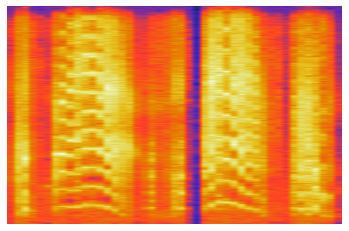

In [61]:
audio_file_path = '/content/infant-cry-care/infant-cry-dataset/partitioned-data/val/Sleepy/11_speed1.wav'
predict(audio_file_path)

In [62]:
import glob
test_files = glob.glob('/content/infant-cry-care/infant-cry-dataset/partitioned-data/val/*/*.wav', recursive=True)

In [63]:
test_labels = [fname.split('/')[-2] for fname in test_files]

In [64]:
import pandas as pd 
test_df = pd.DataFrame({'wav_file': test_files, 'label': test_labels})
test_df.head()

,wav_file,label
0,/content/infant-cry-care/infant-cry-dataset/pa...,asphyxia
1,/content/infant-cry-care/infant-cry-dataset/pa...,asphyxia
2,/content/infant-cry-care/infant-cry-dataset/pa...,asphyxia
3,/content/infant-cry-care/infant-cry-dataset/pa...,asphyxia
4,/content/infant-cry-care/infant-cry-dataset/pa...,asphyxia


In [65]:
test_df.label.value_counts().to_frame()

,label
asphyxia,425
Hungry,368
normal,254
pain,240
Sleepy,187
Uncomfortable,130
burp up,98
lower gas,75


In [68]:
len(test_df)

1777

In [71]:
sample_df = test_df.sample(n=400)

In [72]:
print(len(sample_df))
sample_df.label.value_counts().to_frame()

400


,label
asphyxia,89
Hungry,82
normal,63
pain,49
Sleepy,42
Uncomfortable,30
burp up,26
lower gas,19


1/1 [==============================] - 0s 55ms/step


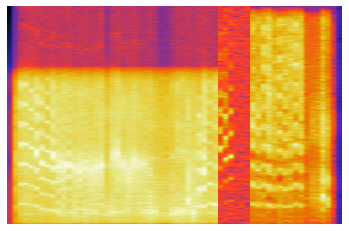

In [73]:
sample_df['prediction'] = sample_df['wav_file'].apply(predict)

In [74]:
sample_df

,wav_file,label,prediction
250,/content/infant-cry-care/infant-cry-dataset/pa...,asphyxia,asphyxia
32,/content/infant-cry-care/infant-cry-dataset/pa...,asphyxia,asphyxia
1537,/content/infant-cry-care/infant-cry-dataset/pa...,pain,pain
877,/content/infant-cry-care/infant-cry-dataset/pa...,Hungry,Hungry
104,/content/infant-cry-care/infant-cry-dataset/pa...,asphyxia,asphyxia
...,...,...,...
1298,/content/infant-cry-care/infant-cry-dataset/pa...,lower gas,lower gas
405,/content/infant-cry-care/infant-cry-dataset/pa...,asphyxia,lower gas
182,/content/infant-cry-care/infant-cry-dataset/pa...,asphyxia,lower gas
1479,/content/infant-cry-care/infant-cry-dataset/pa...,Sleepy,lower gas


In [75]:
sample_df.prediction.value_counts().to_frame()

,prediction
Hungry,266
Sleepy,39
lower gas,37
burp up,29
Uncomfortable,25
asphyxia,3
pain,1


In [76]:
sample_df.to_csv('predictions_sample_400.csv', index=False)